In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_msroom = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")

In [3]:
df_msroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df_msroom.shape

(8124, 23)

The shape of Dataset contains 8124 rows and 23 columns

In [5]:
df_msroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df_msroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Observations

1. We see the all variables are in object type.
2. As per the problem statment we have to predit class hence problem seems classification.
3. In order to create machine learning model we have to convert data in the numeric form.
4. There is no null value.

### Backup dataset

In [7]:
Backup_data = df_msroom.copy()

In [8]:
# Columns names seems quite long so here we can convert into sort 

df_col=df_msroom.columns  # getting only columns name 
list(df_col)

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [9]:
df_msroom.rename({'cap-shape':'shape','cap-surface':'surface','cap-color':'color','gill-attachment':'gill attachment',
                 'gill-spacing':'gill spacing','gill-size':'size','gill-color':'color','stalk-shape':'stalk shape',
                 'stalk-root':'root','stalk-surface-above-ring':'stalk surface above ring','stalk-surface-below-ring':
                 'stalk surface below ring','stalk color above ring':'stalk color above ring','stalk-color-below-ring':'stalk color below ring',
                 'veil-type':'veil type','veil-color':'veil color','ring number':'ring number','ring-type':'ring type',
                 'spore-print-color':'spore print color'},axis=1,inplace=True)

In [10]:
df_msroom.head()

,class,shape,surface,color,bruises,odor,gill attachment,gill spacing,size,color,...,stalk surface below ring,stalk-color-above-ring,stalk color below ring,veil type,veil color,ring-number,ring type,spore print color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Exploratory Data Analysis (EDA)

As we know the target variable is binory hence we are checking the distribution using count plot.

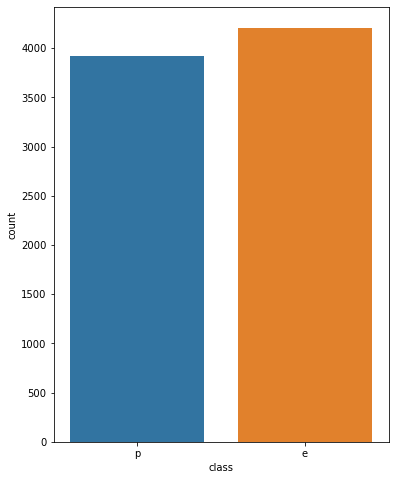

In [11]:
plt.figure(figsize=(6,8))
sns.countplot(df_msroom['class'])

Here above we can see the ediable mashroom count is higher then the poisonous mashroom

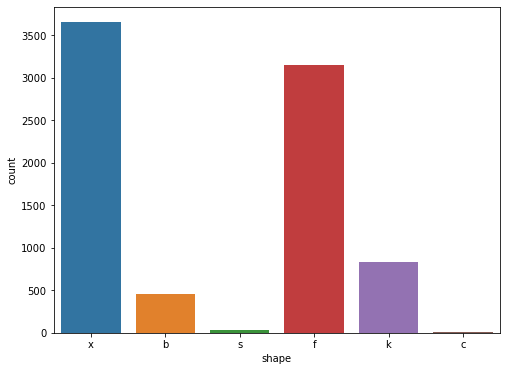

In [12]:
plt.figure(figsize=(8,6))
#g=sns.catplot(x="shape",hue="color",col="class",data=df_msroom,kind="count",height=8,aspect=.7);
sns.countplot(x='shape',data=df_msroom)

### Categorical Encoding

Our data is in categorical varaibles hence we have to conver into numeric for our ml mode.Here we are using the categorical 
encoding.

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
df_msroom = df_msroom.apply(LabelEncoder().fit_transform)
df_msroom.head()

,class,shape,surface,color,bruises,odor,gill attachment,gill spacing,size,color,...,stalk surface below ring,stalk-color-above-ring,stalk color below ring,veil type,veil color,ring-number,ring type,spore print color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


###### Spliting Data

In [15]:
X = df_msroom.drop(['class'],axis=1)
y = df_msroom['class']

In [16]:
print("X size of data",X.shape)
print("Y size of data",y.shape)

X size of data (8124, 22)
Y size of data (8124,)


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.25,random_state=111)

In [20]:
print("X_train size of data",X_train.shape)
print("X_test size of data",X_test.shape)
print("y_train size of data",y_train.shape)
print("y_train size of data",y_train.shape)

X_train size of data (6093, 22)
X_test size of data (2031, 22)
y_train size of data (6093,)
y_train size of data (6093,)


## Model Building

Importing libraries for model building......! 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [22]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()

print("Model is created")

Model is created


Traning The model............!

In [23]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)

print("Model is trained")

Model is trained


Score prediction.............!

In [24]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))

Lr classification score 0.9584769407516822
knn classification score 1.0
dt classification score 1.0
rf classification score 1.0
adb classification score 1.0


In [25]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)

### Model Evaluation 

* Using confusion matrix in order to evaluate the models accuracy

In [26]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[991  39]
 [ 55 946]]


In [27]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for lr_model",'\n',knn_conf_mat)

confusion matrix for lr_model 
 [[1030    0]
 [   0 1001]]


In [28]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for lr_model",'\n',dt_conf_mat)

confusion matrix for lr_model 
 [[1030    0]
 [   0 1001]]


In [29]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

confusion matrix for lr_model 
 [[1030    0]
 [   0 1001]]


In [30]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)

confusion matrix for lr_model 
 [[1030    0]
 [   0 1001]]


* Classification Report for Our models

In [31]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1030
           1       0.96      0.95      0.95      1001

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031

 knn classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1030
           1       1.00      1.00      1.00      1001

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

 dt classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1030
           1       1.00      1.00      1.00      1001

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00

We can check our models accuracy's are :
* Linear regression - 95%
* Knn               - 100%
* Decesion Tree     - 100%
* Random Forest     - 100%
* AdaBoost          - 100%

However we assume that our model can be over fitted hence I am using cross validation.

## CrossValidation

In [32]:
from sklearn.model_selection import KFold,cross_val_score

In [33]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [34]:
print("Cross validation score for lr model","=>",cross_val_score(lr,X_scale,y,cv=5))
print("Cross validation score for knn model","=>",cross_val_score(knn,X_scale,y,cv=5))
print("Cross validation score for dt model","=>",cross_val_score(dt,X_scale,y,cv=5))
print("Cross validation score for rf model","=>",cross_val_score(rf,X_scale,y,cv=5))
print("Cross validation score for adb model","=>",cross_val_score(adb,X_scale,y,cv=5))

Cross validation score for lr model => [0.67876923 0.98215385 0.87569231 0.99815385 0.61576355]
Cross validation score for knn model => [0.84246154 1.         0.95015385 1.         0.60591133]
Cross validation score for dt model => [0.88184615 1.         1.         1.         0.71921182]
Cross validation score for rf model => [0.84246154 1.         0.99876923 1.         0.61945813]
Cross validation score for adb model => [0.84246154 1.         1.         1.         0.74384236]


In [35]:
print("Mean of Cross validation score for lr model","=>",cross_val_score(lr,X_scale,y,cv=5).mean())
print("Mean of Cross validation score for knn model","=>",cross_val_score(knn,X_scale,y,cv=5).mean())
print("Mean of Cross validation score for dt model","=>",cross_val_score(dt,X_scale,y,cv=5).mean())
print("Mean of Cross validation score for rf model","=>",cross_val_score(rf,X_scale,y,cv=5).mean())
print("Mean of Cross validation score for adb model","=>",cross_val_score(adb,X_scale,y,cv=5).mean())

Mean of Cross validation score for lr model => 0.8301065555134521
Mean of Cross validation score for knn model => 0.8797053429329292
Mean of Cross validation score for dt model => 0.9670099280030314
Mean of Cross validation score for rf model => 0.8985415687760515
Mean of Cross validation score for adb model => 0.9172607805987116


print("Cross validation score for lr model","=>",cross_val_score(lr,X_scale,y,cv=5).mean())
print("Cross validation score for knn model","=>",cross_val_score(knn,X_scale,y,cv=5).mean())
print("Cross validation score for dt model","=>",cross_val_score(dt,X_scale,y,cv=5).mean())
print("Cross validation score for rf model","=>",cross_val_score(rf,X_scale,y,cv=5).mean())
print("Cross validation score for adb model","=>",cross_val_score(adb,X_scale,y,cv=5).mean())

In the above cross validation we can see there are 5 type of score's hence we took mean of all cross validation score's and
sbtracting from our accuracy score's and I found decesion tree classifer giving me the best score.

### HyperParameter Optimization for Better Result

*********************************************** GridSearchCV ************************************************                 

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
parm_grid = {'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}

In [38]:
gridsearch = GridSearchCV(estimator = dt , param_grid = parm_grid)

In [39]:
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [40]:
gridsearch.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

Lets try above parametre to get good score 

In [41]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=5)

In [42]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [43]:
print("dt classification score",dt.score(X_train,y_train))

dt classification score 1.0


In [44]:
dt_yprad = dt.predict(X_test)

In [45]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for lr_model",'\n',dt_conf_mat)

confusion matrix for lr_model 
 [[1030    0]
 [   0 1001]]


In [46]:
dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)

 dt classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1030
           1       1.00      1.00      1.00      1001

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



We can assume that our decision tree model is giving the best score!

## Saving Model

In [47]:
import pickle

In [48]:
filename = 'finalized_model.pickle'

In [49]:
pickle.dump(dt,open(filename,'wb'))

### Thankyou....! 